In [3]:
import numpy as np
import matplotlib.pyplot as plt
from Pressure_Poisson_Equation_Solver import setup_solvers
from Quasi_Rhie_Chow import quasi_Rhie_Chow_iteration, converged
from Boundary_Conditions import update_ghost_cell_pressure, update_ghost_cell_velocities

ModuleNotFoundError: No module named 'numpy'

In [8]:
# Constants

# Acceleration due to gravity
g   = 0 # 9.8   # m/s2

# Density of Fluid
rho = 1.0   # kg/m3

# Kinematic Viscosity
nu  = 0.01

In [4]:
# Grid Generation
M = 10

Dx = Dy = 1.0 / M

# M x M cells + Ghost cells on either boundaries
x = np.linspace(-Dx/2, 1 + Dx/2, M+2)
y = np.linspace(-Dy/2, 1 + Dy/2, M+2)

NameError: name 'np' is not defined

In [10]:
# Time Step
Dt = 0.01

# CFL Number
num_CFL = Dt / Dx
print('Courant Number : ', num_CFL)

Courant Number :  0.09999999999999999


In [11]:
u = np.zeros((1, M+2, M+2))
v = np.zeros((1, M+2, M+2))

p = np.zeros((1, M+2, M+2))
p[0, 1:-1, 1:-1] = - rho * g * (y[1:-1] - y[-2])

update_ghost_cell_velocities(u[0], v[0])
update_ghost_cell_pressure(p[0], rho, g, Dx, Dy)

In [17]:
# Setting up pressure poisson eqn solver
setup_solvers(M, Dx, Dy)

In [18]:
u_n = np.copy(u[0])
v_n = np.copy(v[0])
p_n = np.copy(p[0])

u_np1, v_np1, p_np1 = quasi_Rhie_Chow_iteration(
    u_n, v_n,
    p_n,
    rho, nu, g,
    Dt,
    Dx, Dy
)

u = np.append(u, [u_np1], axis=0)
v = np.append(v, [v_np1], axis=0)
p = np.append(p, [p_np1], axis=0)

while not converged(u_n, v_n, p_n, u_np1, v_np1, p_np1) :

    u_n = np.copy(u_np1)
    v_n = np.copy(v_np1)
    p_n = np.copy(p_np1)

    u_np1, v_np1, p_np1 = quasi_Rhie_Chow_iteration(
        u_n, v_n,
        p_n,
        rho, nu, g,
        Dt,
        Dx, Dy
    )

    u = np.append(u, [u_np1], axis=0)
    v = np.append(v, [v_np1], axis=0)
    p = np.append(p, [p_np1], axis=0)



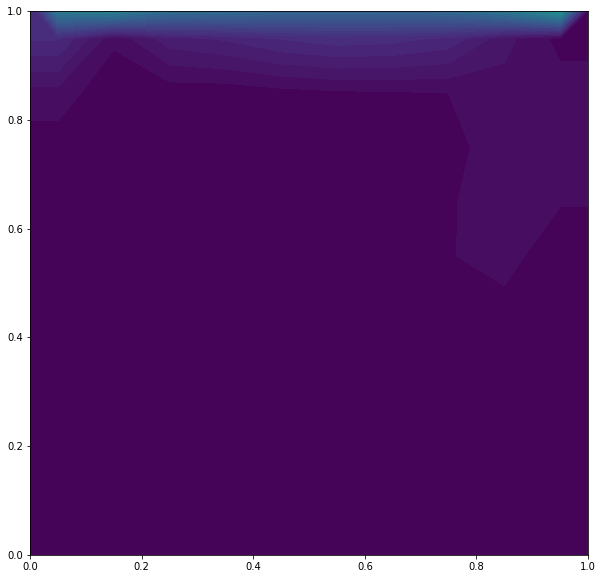

In [24]:
X, Y = np.meshgrid(x, y, indexing='ij')
plt.figure(figsize=[10, 10])

plt.contourf(X, Y, u_np1**2 + v_np1**2, 50)
# plt.streamplot(X[1:-1].T, Y[1:-1].T, u_np1[1:-1].T, v_np1[1:-1].T, 5, arrowstyle='-')
plt.xlim([0,1])
plt.ylim([0,1])
# plt.savefig('Velocity Field.jpeg')
plt.show()